In [1]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
sn.set()
sn.set_style("white")
sn.set_style("ticks")

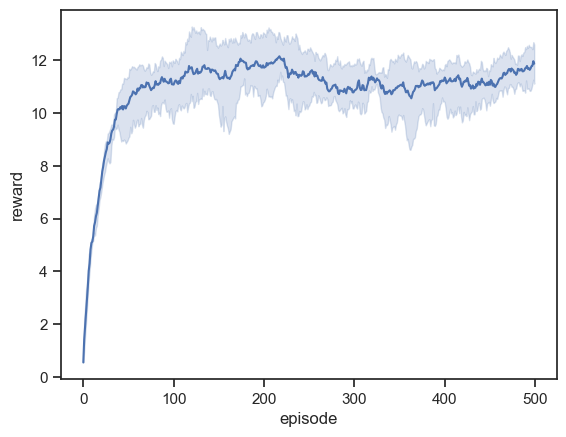

In [2]:
# reward plot
rewarddql0= []
with open(file="./logfile_ms8/2023-06-07 19-51-14-dql0.txt",mode="r") as f:
    lines = f.readlines()
    for c,line in enumerate(lines):
        line = line.strip()
        rew =  line.split(" ")[-1]
        # if c>380:
        #     rew = float(rew) * 0.9
        rewarddql0.append(float(rew))
f.close()

rewarddql1= []
with open(file="./logfile_ms8/2023-06-07 19-58-51-dql1.txt",mode="r") as f:
    lines = f.readlines()
    for c,line in enumerate(lines):
        line = line.strip()
        rew =  line.split(" ")[-1]
        # if c>380:
        #     rew = float(rew) * 0.9
        rewarddql1.append(float(rew))
f.close()

rewarddql1037= []
with open(file="./logfile_ms8/2023-06-07 20-08-55-dql1037.txt",mode="r") as f:
    lines = f.readlines()
    for c,line in enumerate(lines):
        line = line.strip()
        rew =  line.split(" ")[-1]
        # if c>380:
        #     rew = float(rew) * 0.9
        rewarddql1037.append(float(rew))
f.close()

rewardsdql=np.concatenate((rewarddql0,rewarddql1,rewarddql1037)) # 合并数组
episode1=range(len(rewarddql0))
episode2=range(len(rewarddql1))
episode3=range(len(rewarddql1037))
episode=np.concatenate((episode1,episode2,episode3))
sn.lineplot(x=episode,y=rewardsdql)
plt.xlabel("episode")
plt.ylabel("reward")
plt.show()

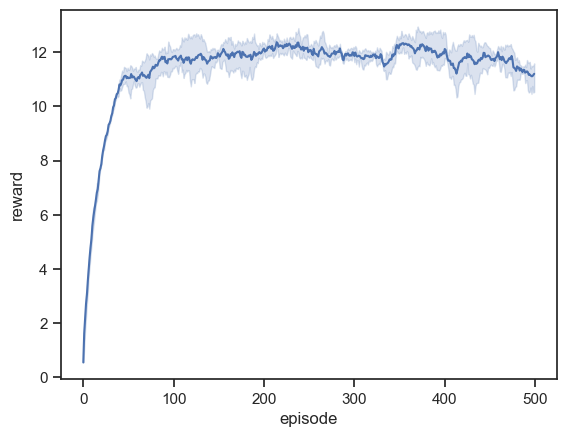

In [3]:
rewardmb0= []
with open(file="./logfile_ms8/2023-06-07 19-51-44-mb0.txt",mode="r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardmb0.append(float(rew))
f.close()

rewardmb1= []
with open(file="./logfile_ms8/2023-06-07 19-59-26-mb1.txt",mode="r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardmb1.append(float(rew))
f.close()

rewardmb1037= []
with open(file="./logfile_ms8/2023-06-07 20-09-30-mb1037.txt",mode="r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardmb1037.append(float(rew))
f.close()

rewardsmb=np.concatenate((rewardmb0,rewardmb1,rewardmb1037)) # 合并数组
episode1=range(len(rewardmb0))
episode2=range(len(rewardmb1))
episode3=range(len(rewardmb1037))
episode=np.concatenate((episode1,episode2,episode3))
sn.lineplot(x=episode,y=rewardsmb)
plt.xlabel("episode")
plt.ylabel("reward")
plt.show()

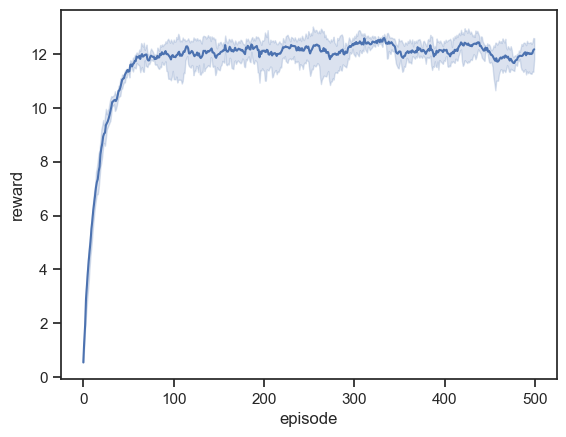

In [4]:

rewardrms0= []
with open(file="./logfile_ms8/2023-06-07 19-52-43-rms0.txt",mode="r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardrms0.append(float(rew))
f.close()

rewardrms1= []
with open(file="./logfile_ms8/2023-06-07 20-00-32-rms1.txt",mode="r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardrms1.append(float(rew))
f.close()

rewardrms1037= []
with open(file="./logfile_ms8/2023-06-07 20-10-42-rms1037.txt",mode="r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        rew =  line.split(" ")[-1]
        rewardrms1037.append(float(rew))
f.close()

rewardsrms=np.concatenate((rewardrms0,rewardrms1,rewardrms1037)) # 合并数组
episode1=range(len(rewardrms0))
episode2=range(len(rewardrms1))
episode3=range(len(rewardrms1037))
episode=np.concatenate((episode1,episode2,episode3))
sn.lineplot(x=episode,y=rewardsrms)
plt.xlabel("episode")
plt.ylabel("reward")
plt.show()

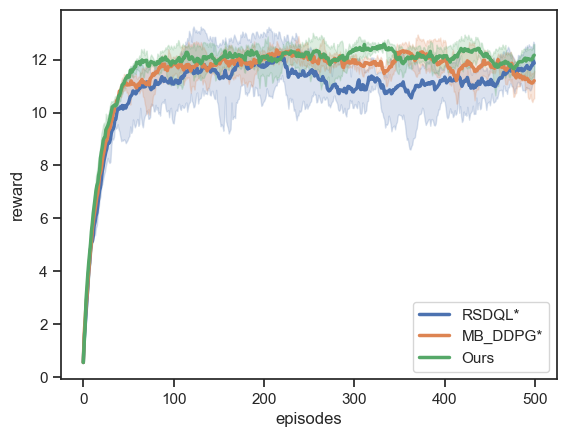

In [5]:

# 整合
sn.lineplot(x=episode,y=rewardsdql,linewidth = 2.5,label = "RSDQL*")
sn.lineplot(x=episode,y=rewardsmb,linewidth = 2.5,label = "MB_DDPG*")
sn.lineplot(x=episode,y=rewardsrms,linewidth = 2.5,label = "Ours")
plt.xlabel("episodes")
plt.ylabel("reward")
plt.show()

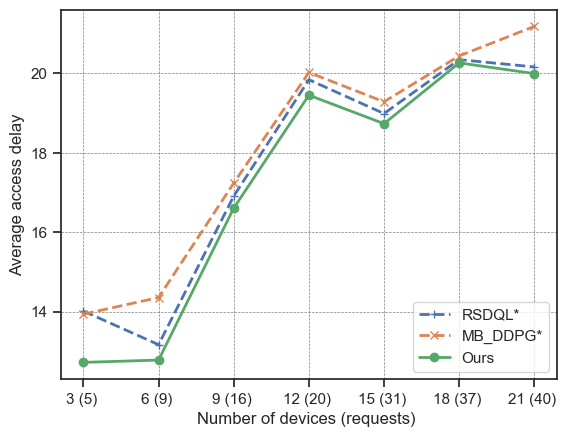

In [10]:
# 请求时延plot
device = [3,6,9,12,15,18,21]
chains = [5,9,16,20,31,37,40]
delay_rms = [63.5972,115.0001,265.6933,389.0456,580.7693,749.8459,799.8628]
delay_avg_rms = [delay_rms[i]/chains[i] for i in range(len(device))]
delay_mb = [69.6724,129.1780,275.7958,400.4898,597.8789,756.3495,847.4519]
delay_avg_mb = [delay_mb[i]/chains[i] for i in range(len(device))]
delay_dql = [70.0570,118.4898,270.5300,396.8463,588.6673,752.8694,806.5733]
delay_avg_dql = [delay_dql[i]/chains[i] for i in range(len(device))]
xstick = ["3 (5) ","6 (9) ","9 (16) ","12 (20) ","15 (31) ","18 (37) ","21 (40) "]
plt.figure()
plt.plot(device,delay_avg_dql,label = "RSDQL*",marker="+",linestyle="--",linewidth = 2)
plt.plot(device,delay_avg_mb,label = "MB_DDPG*",marker="x",linestyle="--",linewidth = 2)
plt.plot(device,delay_avg_rms,label = "Ours",marker="o",linestyle="-",linewidth = 2)
# plt.plot(device,delay_rms,label = "Ours",marker="o",linestyle="-",linewidth = 1.5)
# plt.plot(device,delay_mb,label = "MB_DDPG*",marker="x",linestyle="--",linewidth = 1.5)
# plt.plot(device,delay_dql,label = "RSDQL*",marker="+",linestyle="--",linewidth = 1.5)
plt.xticks(device,xstick)
plt.legend(loc="lower right")
plt.xlabel("Number of devices (requests) ")
plt.ylabel("Average access delay")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()

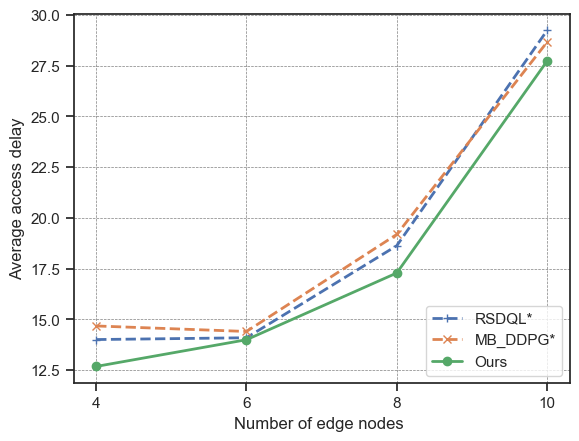

In [7]:
# 请求时延plot
nodes = [4,6,8,10]
delay_rms = [63.4336,70.0136,86.4508,138.6318]
delay_avg_rms = [delay_rms[i]/5 for i in range(len(nodes))]
delay_mb = [73.4052,72.0457,95.9484,143.3053]
delay_avg_mb = [delay_mb[i]/5 for i in range(len(nodes))]
delay_dql = [70.0570,70.5,93.1673,146.1755]
delay_avg_dql = [delay_dql[i]/5 for i in range(len(nodes))]
plt.figure()
plt.plot(nodes,delay_avg_dql,label = "RSDQL*",marker="+",linestyle="--",linewidth = 2)
plt.plot(nodes,delay_avg_mb,label = "MB_DDPG*",marker="x",linestyle="--",linewidth = 2)
plt.plot(nodes,delay_avg_rms,label = "Ours",marker="o",linestyle="-",linewidth = 2)
# plt.plot(device,delay_rms,label = "Ours",marker="o",linestyle="-",linewidth = 1.5)
# plt.plot(device,delay_mb,label = "MB_DDPG*",marker="x",linestyle="--",linewidth = 1.5)
# plt.plot(device,delay_dql,label = "RSDQL*",marker="+",linestyle="--",linewidth = 1.5)
plt.xticks(nodes)
plt.legend(loc="lower right")
plt.xlabel("Number of edge nodes ")
plt.ylabel("Average access delay")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()

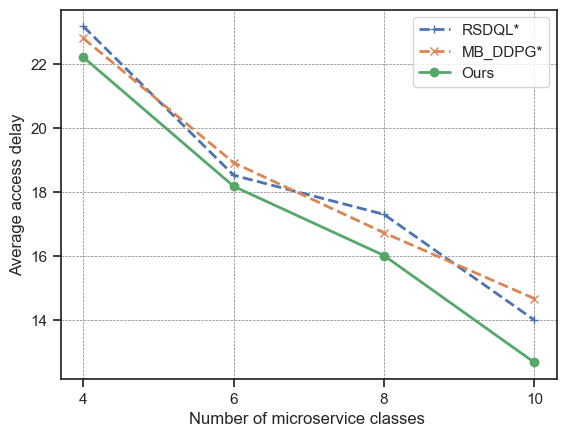

In [8]:
# 请求时延plot
ms = [4,6,8,10]
delay_rms = [111.0841,90.9349,80.1338,63.4336]
delay_avg_rms = [delay_rms[i]/5 for i in range(len(nodes))]
delay_mb = [114.0494,94.6250,83.6794,73.4052]
delay_avg_mb = [delay_mb[i]/5 for i in range(len(nodes))]
delay_dql = [115.9104,92.6685,86.5543,70.0570]
delay_avg_dql = [delay_dql[i]/5 for i in range(len(nodes))]
plt.figure()
plt.plot(nodes,delay_avg_dql,label = "RSDQL*",marker="+",linestyle="--",linewidth = 2)
plt.plot(nodes,delay_avg_mb,label = "MB_DDPG*",marker="x",linestyle="--",linewidth = 2)
plt.plot(nodes,delay_avg_rms,label = "Ours",marker="o",linestyle="-",linewidth = 2)
# plt.plot(device,delay_rms,label = "Ours",marker="o",linestyle="-",linewidth = 1.5)
# plt.plot(device,delay_mb,label = "MB_DDPG*",marker="x",linestyle="--",linewidth = 1.5)
# plt.plot(device,delay_dql,label = "RSDQL*",marker="+",linestyle="--",linewidth = 1.5)
plt.xticks(nodes)
plt.legend(loc="upper right")
plt.xlabel("Number of microservice classes ")
plt.ylabel("Average access delay")
plt.grid(True,linestyle="--",color="gray",linewidth="0.5",axis="both")
plt.show()